**Klasifikakasi Prediksi Penyakit Diabetes Menggunakan K- Nearest Neigbors (Ecludien,Manhattan,Mahalanobis)**

M Hafid Nur Firmansyah - 21104410062 - Teknik Informatika - Data Minning

In [ ]:
# Import Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**Membaca Dataset**

In [ ]:
df = pd.read_csv("Diabetes.csv")
df = df.drop('Unnamed: 0',axis=1)
df.size


6912

In [ ]:
# Check Information Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Kehamilan                 768 non-null    int64  
 1   Glukosa                   768 non-null    int64  
 2   Tekanan Darah             768 non-null    int64  
 3   Ketebalan Kulit           768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Umur                      768 non-null    int64  
 8   Hasil                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Melakukan Normalisasi Data**


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Hasil',axis=1))
scaled_features = scaler.transform(df.drop('Hasil',axis=1))
df_feat = pd.DataFrame(scaled_features,columns= df.columns[:-1])
df_feat.head()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


**Membagi Data Training Dan Test Training Menggunakan Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test , y_train , y_test = train_test_split(scaled_features,df["Hasil"],test_size=0.30)
print(X_train.size)
print(X_test.size)


4296
1848


**Menggunakan KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0
 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0
 1 0 0 0 0 0 0 0 1]


In [ ]:
print(knn.score(X_test,y_test))

0.7619047619047619


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       149
           1       0.73      0.52      0.61        82

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



**Memilih Jumlah K Maksimal Untuk Diterapkan Didalam KNN**

In [ ]:
error_rate = []

for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

print(len(error_rate))

49


Text(0, 0.5, 'Ratio Rate')

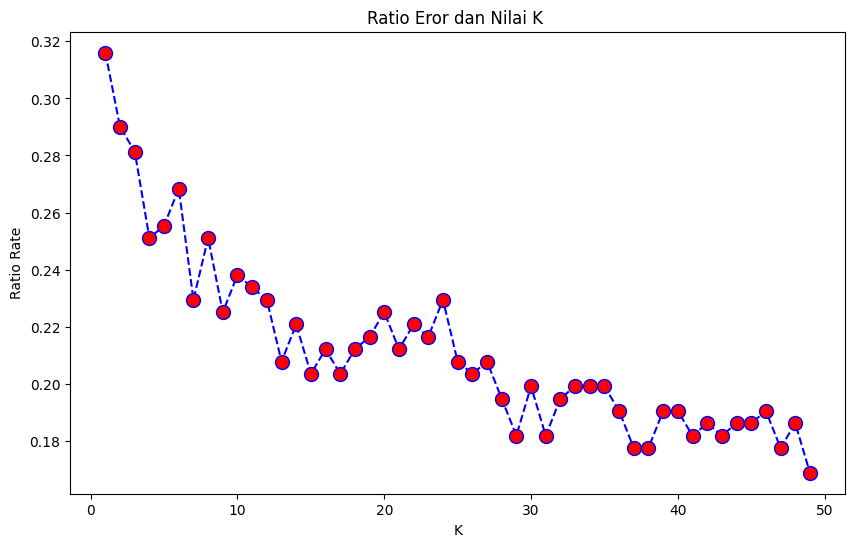

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate , color='blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Ratio Eror dan Nilai K ')
plt.xlabel('K')
plt.ylabel('Ratio Rate')

Disini Kita Bisa melihat bahwa nilai k 10-15 memiliji nilai ratio error yang rendah yaitu sekita 0.23-0.25.**Maka Akan Kita bandingkan dengan nilai K = 1 dengan K = 11**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[116  33]
 [ 40  42]]


              precision    recall  f1-score   support

           0       0.74      0.78      0.76       149
           1       0.56      0.51      0.54        82

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231



In [ ]:
# NOW WITH K=25
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[141   8]
 [ 38  44]]


              precision    recall  f1-score   support

           0       0.79      0.95      0.86       149
           1       0.85      0.54      0.66        82

    accuracy                           0.80       231
   macro avg       0.82      0.74      0.76       231
weighted avg       0.81      0.80      0.79       231



**Melakukan Uji Akurasi n = 1 Untuk Euclidean dan manhattan**

In [ ]:
knn_ecludien = KNeighborsClassifier(n_neighbors=1,metric = 'euclidean')
knn_ecludien.fit(X_train,y_train)
print('Accuracy Euclidien : ',knn_ecludien.score(X_test,y_test))

knn_manhattan = KNeighborsClassifier(n_neighbors=1,metric = 'manhattan')
knn_manhattan.fit(X_train,y_train)
print('Accuracy Manhattan : ',knn_manhattan.score(X_test,y_test))

Accuracy Euclidien :  0.683982683982684
Accuracy Manhattan :  0.6926406926406926


**Melakukan Perbandigan Accuracy Dengan Matriks Ecludien,Manhattan,Mahalanobis**

In [ ]:
error_rate_Ecludien     = []
error_rate_Manhattan    = []
# error_rate_Mahalanobis  = []

for i in range(1,50):
  knn_ecludien = KNeighborsClassifier(n_neighbors=i,metric = 'euclidean')
  knn_manhattan = KNeighborsClassifier(n_neighbors=i,metric = 'manhattan')
  # knn_mahalanobis = KNeighborsClassifier(n_neighbors=i,metric = 'euclidean')
  knn_ecludien.fit(X_train,y_train)
  knn_manhattan.fit(X_train,y_train)
  # knn_mahalanobis.fit(X_train,y_train)
  pred_i_ecludien = knn_ecludien.predict(X_test)
  pred_i_manhattan = knn_manhattan.predict(X_test)
  error_rate_Ecludien.append(np.mean(pred_i_ecludien != y_test))
  error_rate_Manhattan.append(np.mean(pred_i_manhattan != y_test))

print(error_rate_Ecludien)
print(error_rate_Manhattan)

[0.31601731601731603, 0.29004329004329005, 0.2813852813852814, 0.2510822510822511, 0.2554112554112554, 0.2683982683982684, 0.22943722943722944, 0.2510822510822511, 0.22510822510822512, 0.23809523809523808, 0.23376623376623376, 0.22943722943722944, 0.2077922077922078, 0.22077922077922077, 0.20346320346320346, 0.21212121212121213, 0.20346320346320346, 0.21212121212121213, 0.21645021645021645, 0.22510822510822512, 0.21212121212121213, 0.22077922077922077, 0.21645021645021645, 0.22943722943722944, 0.2077922077922078, 0.20346320346320346, 0.2077922077922078, 0.19480519480519481, 0.18181818181818182, 0.19913419913419914, 0.18181818181818182, 0.19480519480519481, 0.19913419913419914, 0.19913419913419914, 0.19913419913419914, 0.19047619047619047, 0.1774891774891775, 0.1774891774891775, 0.19047619047619047, 0.19047619047619047, 0.18181818181818182, 0.18614718614718614, 0.18181818181818182, 0.18614718614718614, 0.18614718614718614, 0.19047619047619047, 0.1774891774891775, 0.18614718614718614, 0.

**Memilih Jumlah K Maksimal Untuk Diterapkan Didalam KNN (Ecludien dan Manhattan)**

Text(0, 0.5, 'Ratio Error Rate')

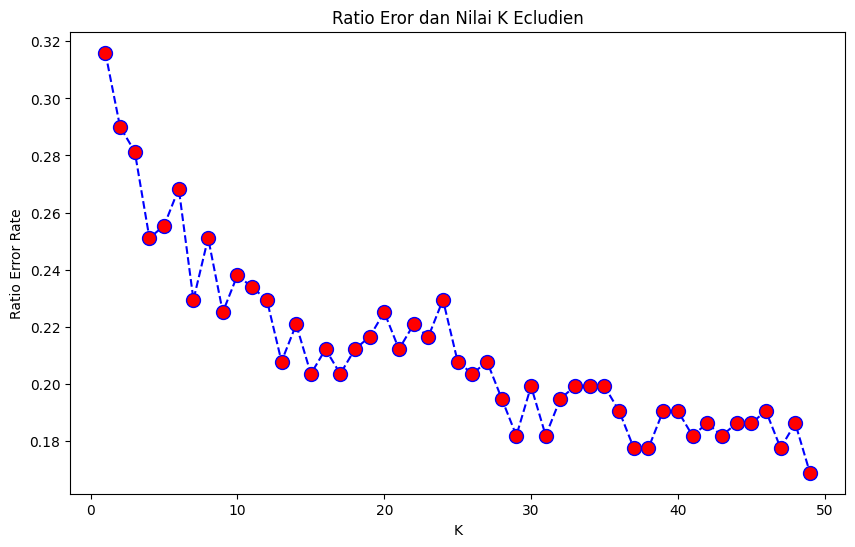

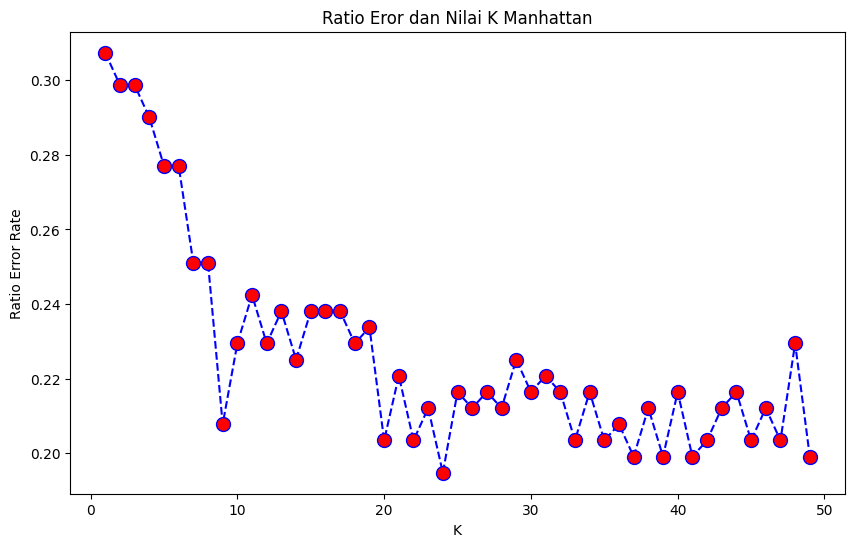

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate_Ecludien , color='blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Ratio Eror dan Nilai K Ecludien')
plt.xlabel('K')
plt.ylabel('Ratio Error Rate')

print("")

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate_Manhattan , color='blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Ratio Eror dan Nilai K Manhattan')
plt.xlabel('K')
plt.ylabel('Ratio Error Rate')

**Dengan Melihat Chart diatas dapat disimpulkan bahwa nilai K dari error rate terkecil untuk Ecluidien diangka 30 sedangkan Manhattan diangka 25**

In [ ]:
knn_ecludien = KNeighborsClassifier(n_neighbors=30,metric = 'euclidean')
knn_ecludien.fit(X_train,y_train)
print('Accuracy Euclidien : ',knn_ecludien.score(X_test,y_test))

knn_manhattan = KNeighborsClassifier(n_neighbors=25,metric = 'manhattan')
knn_manhattan.fit(X_train,y_train)
print('Accuracy Manhattan : ',knn_manhattan.score(X_test,y_test))

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Accuracy Wilowiskie : ',knn.score(X_test,y_test))


Accuracy Euclidien :  0.8008658008658008
Accuracy Manhattan :  0.7835497835497836
Accuracy Wilowiskie :  0.8008658008658008
